In [1]:
# --------------------------------------------------------------
# 📦 Import Required Libraries for Data Handling and Visualization
# --------------------------------------------------------------

# NumPy is used for numerical operations and efficient array handling
import numpy as np

# JSON module is used to load or save structured data in a human-readable format
import json

# Matplotlib is a core library for static 2D and 3D plotting
import matplotlib.pyplot as plt

# Axes3D enables 3D plotting capabilities in Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Plotly is used for creating interactive, browser-based visualizations
# 'graph_objects' offers fine-grained control over plot components
import plotly.graph_objects as go

In [3]:
# --------------------------------------------------------------
# 🧪 Step 2: Define Data Generation Parameters for Each Fruit
# --------------------------------------------------------------

# Set a fixed random seed to ensure reproducibility of the synthetic dataset.
# This guarantees the same results each time the notebook is run.
np.random.seed(42)

# Define the statistical properties of each fruit type.
# Each entry provides the (mean, standard deviation) for the following features:
# - weight (grams)
# - length (centimeters)
# - roundness (shape ratio, 0–1)
# - hue (color tone, degrees from image-based sensor)
fruit_specs = {
    'apple': {
        'weight': (180, 15),        # Medium weight, moderate variance
        'length': (7.0, 0.5),       # Small to medium-sized
        'roundness': (0.95, 0.02),  # Highly round
        'hue': (10, 2)              # Reddish color hue
    },
    'banana': {
        'weight': (120, 10),        # Lighter than apples
        'length': (15.0, 0.5),      # Long and thin
        'roundness': (0.5, 0.05),   # Low roundness (more elongated)
        'hue': (25, 2)              # Yellowish hue
    },
    'potato': {
        'weight': (220, 20),        # Heaviest among the four
        'length': (8.0, 0.5),       # Irregular size
        'roundness': (0.7, 0.05),   # Moderately round
        'hue': (35, 3)              # Brownish/earthy tone
    },
    'orange': {
        'weight': (150, 10),        # Similar to apple, slightly lighter
        'length': (7.5, 0.3),       # Close to apple size
        'roundness': (0.92, 0.02),  # Very round like apple
        'hue': (20, 2)              # Orange hue
    }
}

In [4]:
# --------------------------------------------------------------
# 🧪 Step 3: Generate Synthetic Fruit Data (Training + Testing)
# --------------------------------------------------------------

# Function to generate synthetic samples for a given fruit type
# Parameters:
#   - fruit: string, name of the fruit (e.g., 'apple')
#   - specs: dictionary of (mean, std) for each feature
#   - count: number of samples to generate
# Returns:
#   - list of dictionaries, each containing feature values + class label
def generate_data(fruit, specs, count):
    data = []
    for _ in range(count):
        sample = {
            'weight': np.random.normal(*specs['weight']),       # Sample weight from normal distribution
            'length': np.random.normal(*specs['length']),       # Sample length
            'roundness': np.random.normal(*specs['roundness']), # Sample roundness
            'hue': np.random.normal(*specs['hue']),             # Sample hue
            'label': fruit                                       # Assign class label
        }
        data.append(sample)
    return data

# Initialize lists to store training and test sets
train_data = []
test_data = []

# Generate 40 samples per fruit: 30 for training, 10 for testing
for fruit, specs in fruit_specs.items():
    print(f"Generating data for {fruit}: {specs}")
    samples = generate_data(fruit, specs, 40)
    train_data.extend(samples[:30])  # First 30 → training
    test_data.extend(samples[30:])   # Last 10 → testing

Generating data for apple: {'weight': (180, 15), 'length': (7.0, 0.5), 'roundness': (0.95, 0.02), 'hue': (10, 2)}
Generating data for banana: {'weight': (120, 10), 'length': (15.0, 0.5), 'roundness': (0.5, 0.05), 'hue': (25, 2)}
Generating data for potato: {'weight': (220, 20), 'length': (8.0, 0.5), 'roundness': (0.7, 0.05), 'hue': (35, 3)}
Generating data for orange: {'weight': (150, 10), 'length': (7.5, 0.3), 'roundness': (0.92, 0.02), 'hue': (20, 2)}


In [5]:
# --------------------------------------------------------------
# 🧪 Step 4: Convert Raw JSON Data into NumPy Arrays for Modeling
# --------------------------------------------------------------

# If loading from file:
# with open("fruit_train.json") as f: train_data = json.load(f)
# with open("fruit_test.json") as f: test_data = json.load(f)

# Map class labels to numerical indices for one-hot encoding
label_to_index = {
    'apple': 0,
    'banana': 1,
    'potato': 2,
    'orange': 3
}
num_classes = len(label_to_index)

# Function to extract features and one-hot encoded labels
# Inputs:
#   - data: list of dictionaries with keys 'weight', 'length', 'roundness', 'hue', 'label'
# Outputs:
#   - X: NumPy array of shape (N, 4), where N is number of samples
#   - Y: NumPy array of shape (N, 4), one-hot encoded labels
def process_dataset(data):
    X = []
    Y = []
    for sample in data:
        # Extract the 4 features
        features = [
            sample['weight'],
            sample['length'],
            sample['roundness'],
            sample['hue']
        ]
        X.append(features)

        # Convert class label to one-hot encoding
        label_index = label_to_index[sample['label']]
        one_hot = [0] * num_classes
        one_hot[label_index] = 1
        Y.append(one_hot)
    
    return np.array(X), np.array(Y)

# Transform training and test data into feature matrices and label matrices
X_train, Y_train = process_dataset(train_data)
X_test, Y_test = process_dataset(test_data)

In [14]:
# --------------------------------------------------------------
# 🧮 Step 5: Train Linear Least Squares Classifier and Predict
# --------------------------------------------------------------

# ✅ Step 1: Add bias term to training features
# Append a column of 1s to X_train to model the bias (intercept) in the linear function
# Resulting shape: (N, d+1), where d is number of original features
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

# ✅ Step 2: Solve for weight matrix W using the least squares solution
# Formula: W = (XᵀX)⁻¹ XᵀY → computes optimal weights minimizing squared error
# W shape: (d+1, K), where K is the number of classes
W = np.linalg.pinv(X_train_bias) @ Y_train

# ✅ Step 3: Prepare test data by adding the bias term
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [15]:
# ✅ Step 4: Compute class scores via matrix multiplication
# Each row in `scores` is a vector of class scores for one test sample
scores = X_test_bias @ W

# ✅ Step 5: Predict class by taking the index of the max score (argmax)
# This gives the predicted class index for each test sample
predictions = np.argmax(scores, axis=1)

In [13]:
print(scores.shape)

(40, 4)


<generator object <genexpr> at 0x752ba3eeb680>


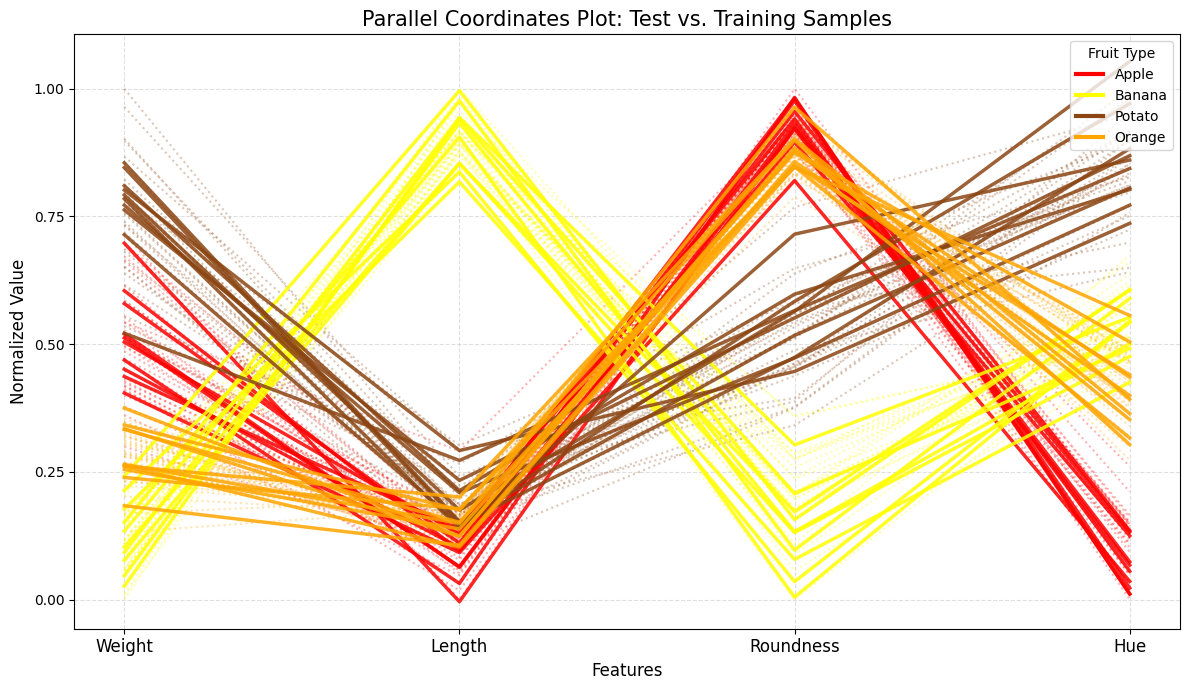

In [24]:
# --------------------------------------------------------------
# 📊 Step 7 (Updated): Parallel Coordinates Plot — Test vs. Training
# --------------------------------------------------------------
# Shows how test samples relate to the training distribution across all 4 features.
# Training data: dotted, faded lines in the background
# Test data: solid, vivid lines in the foreground
# --------------------------------------------------------------

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ✅ Normalize both datasets to [0, 1] based on training feature ranges
X_min = X_train.min(axis=0) #X_train.min(axis=0) returns a 1D array with 4 elements
X_max = X_train.max(axis=0)
X_train_norm = (X_train - X_min) / (X_max - X_min)
X_test_norm = (X_test - X_min) / (X_max - X_min)

# ✅ Feature and color setup
feature_names = ['Weight', 'Length', 'Roundness', 'Hue']
x_ticks = np.arange(len(feature_names))

label_to_color = {
    'apple': 'red',
    'banana': 'yellow',
    'potato': 'saddlebrown',
    'orange': 'orange'
}

# create new dictionary with exchange columns
index_to_label = {v: k for k, v in label_to_index.items()}

# ✅ Decode labels
y_train_labels = [index_to_label[np.argmax(y)] for y in Y_train] #np.argmax(y) returns the element position of the "1" within y
y_test_labels = [index_to_label[np.argmax(y)] for y in Y_test]
colors_train = [label_to_color[label] for label in y_train_labels]
colors_test = [label_to_color[label] for label in y_test_labels]

# ✅ Create plot
plt.figure(figsize=(12, 7))

# 🔹 Plot training data (dotted and transparent)
for i in range(X_train_norm.shape[0]):
    plt.plot(x_ticks, X_train_norm[i],
             color=colors_train[i],
             linewidth=1.5,
             linestyle=':',
             alpha=0.3)

# 🔸 Plot test data (solid and bold)
for i in range(X_test_norm.shape[0]):
    plt.plot(x_ticks, X_test_norm[i],
             color=colors_test[i],
             linewidth=2.5,
             linestyle='-',
             alpha=0.85)

# ✅ Format axes and labels
plt.xticks(ticks=x_ticks, labels=feature_names, fontsize=12)
plt.yticks(np.linspace(0, 1, 5), fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.title("Parallel Coordinates Plot: Test vs. Training Samples", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)

# ✅ Legend
legend_elements = [
    Line2D([0], [0], color=color, lw=3, label=label.capitalize())
    for label, color in label_to_color.items()
]
plt.legend(handles=legend_elements, title="Fruit Type", loc='upper right')

plt.tight_layout()
plt.show()

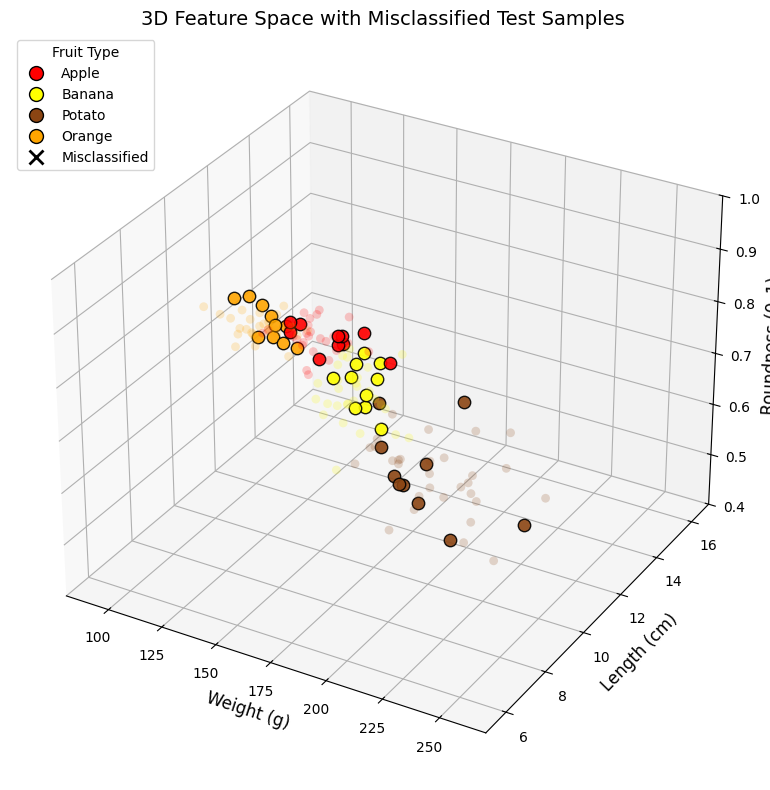

In [9]:
# --------------------------------------------------------------
# 📊 Step 8: 3D Visualization with Misclassification Highlighting
# --------------------------------------------------------------
# This plot shows the spatial distribution of fruit samples using three features:
# ➤ Weight, Length, and Roundness
# Test samples are plotted over the training set.
# Misclassified test samples are clearly marked in black with 'X' markers.
# --------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# --------------------------------------------------------------
# 🔧 Step 1: Define label mappings and color scheme
# --------------------------------------------------------------
label_to_index = {'apple': 0, 'banana': 1, 'potato': 2, 'orange': 3}
index_to_label = {v: k for k, v in label_to_index.items()}
label_to_color = {'apple': 'red', 'banana': 'yellow', 'potato': 'saddlebrown', 'orange': 'orange'}

# Decode one-hot labels to string labels for plotting
y_train_labels = [index_to_label[np.argmax(y)] for y in Y_train]
y_test_labels = [index_to_label[np.argmax(y)] for y in Y_test]
colors_train = [label_to_color[label] for label in y_train_labels]
colors_test = [label_to_color[label] for label in y_test_labels]

# --------------------------------------------------------------
# 🧠 Step 2: Train Least Squares Classifier
# --------------------------------------------------------------
# Add bias term to training features and solve using pseudoinverse
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
W = np.linalg.pinv(X_train_bias) @ Y_train

# --------------------------------------------------------------
# 🔍 Step 3: Predict on Test Data and Identify Errors
# --------------------------------------------------------------
# Add bias to test data
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
scores = X_test_bias @ W

# Class predictions via argmax
predicted_indices = np.argmax(scores, axis=1)
true_indices = np.argmax(Y_test, axis=1)

# Identify misclassified samples
misclassified = predicted_indices != true_indices

# --------------------------------------------------------------
# 📈 Step 4: Create 3D Plot
# --------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 🔹 Plot training data (as faded background for context)
ax.scatter(
    X_train[:, 0], X_train[:, 1], X_train[:, 2],
    c=colors_train, s=40, alpha=0.2, edgecolor='none'
)

# 🔸 Plot correctly classified test samples
for i in range(len(X_test)):
    if not misclassified[i]:
        ax.scatter(
            X_test[i, 0], X_test[i, 1], X_test[i, 2],
            c=colors_test[i], s=80, alpha=0.9, edgecolor='k'
        )

# ❌ Highlight misclassified test samples with bold 'X'
for i in range(len(X_test)):
    if misclassified[i]:
        ax.scatter(
            X_test[i, 0], X_test[i, 1], X_test[i, 2],
            c='black', marker='x', s=100, linewidths=2,
            label='Misclassified' if i == np.where(misclassified)[0][0] else ""
        )

# --------------------------------------------------------------
# 🧭 Step 5: Customize Axes and Add Zoom
# --------------------------------------------------------------
ax.set_xlabel('Weight (g)', fontsize=12)
ax.set_ylabel('Length (cm)', fontsize=12)
ax.set_zlabel('Roundness (0–1)', fontsize=12)
ax.set_title('3D Feature Space with Misclassified Test Samples', fontsize=14)

# Manually zoom into realistic feature bounds
ax.set_xlim([80, 270])
ax.set_ylim([5, 17])
ax.set_zlim([0.4, 1.0])

# --------------------------------------------------------------
# 🗂️ Step 6: Construct Custom Legend
# --------------------------------------------------------------
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label.capitalize(),
           markerfacecolor=color, markersize=10, markeredgecolor='k')
    for label, color in label_to_color.items()
]
legend_elements.append(Line2D([0], [0], marker='x', color='black', label='Misclassified',
                              linestyle='None', markersize=10, markeredgewidth=2))
ax.legend(handles=legend_elements, title="Fruit Type", loc='upper left')

plt.tight_layout()
plt.show()

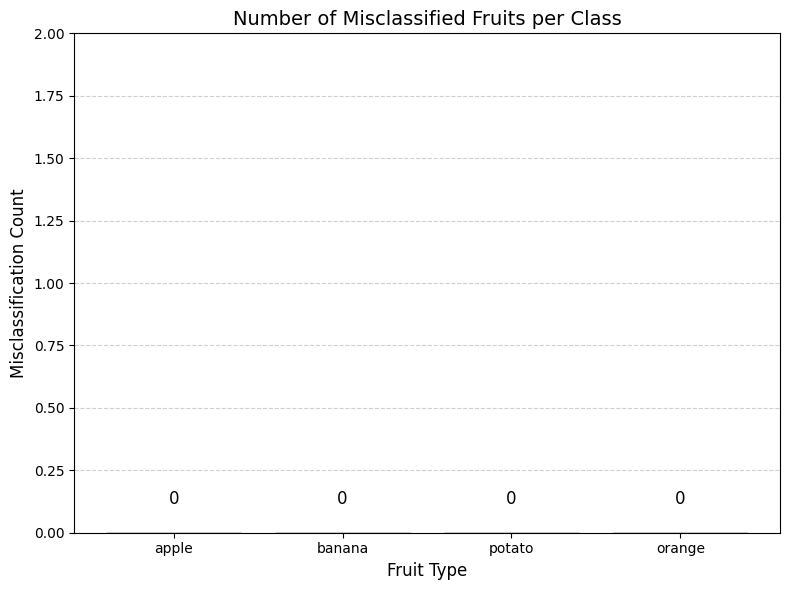

In [12]:
# --------------------------------------------------------------
# 📊 Step 9: Bar Chart of Misclassified Fruits per Class
# --------------------------------------------------------------
# This plot visualizes how many test samples were misclassified
# for each fruit type, based on the true (ground-truth) label.
# Each bar corresponds to a fruit class and is colored accordingly.
# --------------------------------------------------------------

import matplotlib.pyplot as plt

# ✅ Step 1: Count misclassifications by their true class label
# Initialize a counter for each fruit class
misclassified_counts = {label: 0 for label in label_to_index.keys()}

# Loop through test predictions and increment count if wrong
for i, is_wrong in enumerate(misclassified):
    if is_wrong:
        true_label = index_to_label[true_indices[i]]
        misclassified_counts[true_label] += 1

# ✅ Step 2: Prepare data for plotting
labels = list(misclassified_counts.keys())                     # ['apple', 'banana', ...]
counts = [misclassified_counts[label] for label in labels]     # [count for apple, banana, ...]
colors = [label_to_color[label] for label in labels]           # [red, yellow, ...]

# ✅ Step 3: Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors, edgecolor='k')

# ✅ Step 4: Annotate each bar with the misclassification count
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# ✅ Step 5: Customize axes and title
plt.title('Number of Misclassified Fruits per Class', fontsize=14)
plt.xlabel('Fruit Type', fontsize=12)
plt.ylabel('Misclassification Count', fontsize=12)
plt.ylim(0, max(counts) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# ✅ Step 6: Final layout and display
plt.tight_layout()
plt.show()